# Grid Optimization Analysis
Create some visualizations of the Grid Optimization dataset to get a better idea of it.

In [1]:
import numpy as np
import qcportal as ptl
from matplotlib import pyplot as plt
from sklearn import decomposition


## Loading the Data

In [15]:
CLIENT = ptl.FractalClient()
DATASET = CLIENT.get_collection('GridOptimizationDataset',
                                'OpenFF Trivalent Nitrogen Set 1')
MOLECULE_IDS = [
    DATASET.get_entry(index).initial_molecule for index in DATASET.df.index
]
MOLECULES = CLIENT.query_molecules(id=MOLECULE_IDS)
METADATA_ENTRIES = [
    DATASET.get_entry(index).object_map['default'] for index in DATASET.df.index
]
# get all grid optimization calculations from the entire dataset
ENTRIES = CLIENT.query_procedures(METADATA_ENTRIES)

# Remove molecules that have no optimizations
GOOD_MOLECULES = []
GOOD_ENTRIES = []
for idx, entry in enumerate(ENTRIES):
    final_energies = entry.get_final_energies()
    if len(final_energies) != NUM_FRAMES:
        print(f"Molecule {idx:3} ({MOLECULES[idx].get_molecular_formula()}) has {len(final_energies)} frames")
    else:
        GOOD_MOLECULES.append(MOLECULES[idx])
        GOOD_ENTRIES.append(ENTRIES[idx])

Molecule  66 (C22Cl2H24NO6PS) has 0 frames
Molecule  83 (C16H37NO2P2S2) has 0 frames
Molecule  84 (C22H24NO2PS) has 0 frames
Molecule  85 (C20H21N3O4S) has 0 frames
Molecule 138 (C4H6N2O) has 0 frames
Molecule 141 (C19H13NO3S) has 0 frames
Molecule 157 (C31H45N3O8S3) has 0 frames
Molecule 160 (C21H22N2O6S2) has 0 frames
Molecule 175 (C28H22NO2P) has 0 frames
Molecule 193 (C22H24N6O6S2) has 0 frames
Molecule 204 (C12H21N2P) has 0 frames
Molecule 218 (BrC9H8N3) has 0 frames
Molecule 236 (C6H5N3) has 0 frames
Molecule 242 (C13H18N3O2) has 0 frames
Molecule 252 (C24H20NOP) has 0 frames
Molecule 277 (C12H11N2O3S) has 0 frames
Molecule 279 (C10H8N2O2) has 0 frames
Molecule 286 (C7H4INO3S) has 0 frames
Molecule 298 (C22H30N3P) has 0 frames


In [17]:
print(f"There are {len(GOOD_MOLECULES)} good molecules.")


There are 292 good molecules.


## Visualization

Get a better idea of what the data looks like using PCA.

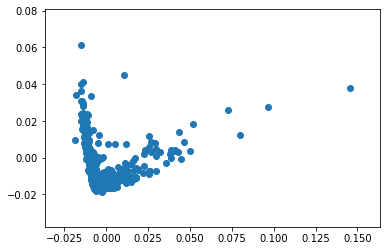

In [21]:
# Create vectors of the energies
NUM_FRAMES = 21
ENERGIES = np.zeros(shape=(len(GOOD_ENTRIES), NUM_FRAMES))

for idx, entry in enumerate(GOOD_ENTRIES):
    final_energies = entry.get_final_energies()
    for frame_idx in range(NUM_FRAMES):
        ENERGIES[idx][frame_idx] = final_energies[(frame_idx,)]
    # Normalize the energies by subtracting the minimum energy
    min_energy = np.min(ENERGIES[idx])
    ENERGIES[idx] -= min_energy

# Apply PCA to reduce to 2d for plotting
pca_2d = decomposition.PCA(n_components=2)
ENERGIES_2D = pca_2d.fit_transform(ENERGIES)
plt.scatter(ENERGIES_2D[:,0], ENERGIES_2D[:,1]);